In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
master_data = pd.read_csv("Resources/MasterData200725.csv")
master_data.head()

,Unnamed: 0,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank
0,0,Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47,38.21,33,49,50
1,1,Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45,39.35,46,39,43
2,2,Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49,36.61,50,29,23
3,3,Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21,52.92,27,12,34
4,4,California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5,63.14,4,24,12


In [10]:
comm_covid_df = master_data[["Mortality Rate", "Community Enviroment Rank"]]
comm_covid_df.head()

,Mortality Rate,Community Enviroment Rank
0,1.122268,50
1,1.875882,43
2,1.079209,23
3,2.010224,34
4,1.880395,12


In [11]:
def regression_func(x, y, color, xlabel='', ylabel='', title='') :
    plot = plt.scatter(x, y, c= color)
    
    (slope, intercept, rvalue, pvalue, stderr) =  linregress(x, y)

    regress_values = (x * slope) + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (min(x)+5, min(y)+5), fontsize=15, color="black")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

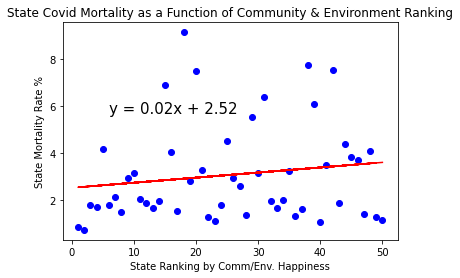

In [12]:
regression_func(comm_covid_df["Community Enviroment Rank"],
                comm_covid_df["Mortality Rate"], "blue", "State Ranking by Comm/Env. Happiness", 
                              "State Mortality Rate %", 
                              "State Covid Mortality as a Function of Community & Environment Ranking")

In [14]:
#Partition into "buckets"
comm_covid_sorted_df = comm_covid_df.sort_values(by = "Community Enviroment Rank")
comm_covid_sorted_df.head()

,Mortality Rate,Community Enviroment Rank
12,0.834106,1
43,0.716897,2
32,1.801322,3
10,1.692525,4
19,4.185114,5


In [19]:
comm_covid_sorted_revised_df = comm_covid_sorted_df["Mortality Rate"]
comm_covid_sorted_revised_df.head()

12    0.834106
43    0.716897
32    1.801322
10    1.692525
19    4.185114
Name: Mortality Rate, dtype: float64

In [21]:
comm_covid_buckets = pd.cut(comm_covid_sorted_revised_df, 10)
comm_covid_buckets

12    (0.708, 1.561]
43    (0.708, 1.561]
32    (1.561, 2.406]
10    (1.561, 2.406]
19    (4.094, 4.939]
27    (1.561, 2.406]
9     (1.561, 2.406]
40    (0.708, 1.561]
46     (2.406, 3.25]
22     (2.406, 3.25]
11    (1.561, 2.406]
4     (1.561, 2.406]
39    (1.561, 2.406]
47    (1.561, 2.406]
37    (6.628, 7.472]
34     (3.25, 4.094]
25    (0.708, 1.561]
6     (8.316, 9.161]
16     (2.406, 3.25]
21    (7.472, 8.316]
23     (3.25, 4.094]
49    (0.708, 1.561]
2     (0.708, 1.561]
36    (1.561, 2.406]
14    (4.094, 4.939]
24     (2.406, 3.25]
44     (2.406, 3.25]
28    (0.708, 1.561]
38    (4.939, 5.783]
20     (2.406, 3.25]
29    (5.783, 6.628]
48    (1.561, 2.406]
35    (1.561, 2.406]
3     (1.561, 2.406]
31     (3.25, 4.094]
15    (0.708, 1.561]
26    (1.561, 2.406]
30    (7.472, 8.316]
33    (5.783, 6.628]
41    (0.708, 1.561]
17     (3.25, 4.094]
18    (7.472, 8.316]
1     (1.561, 2.406]
13    (4.094, 4.939]
7      (3.25, 4.094]
5      (3.25, 4.094]
8     (0.708, 1.561]
45    (4.094,

In [ ]:
#name bins
#either create new dataframe or add columns to covid_community dataframe
#